## Spectral radius plots, EZ model


We compute the approximate spectral radius of the operator

$$    Kf(x) = \beta^\theta \int f(y) \exp[ (1 - \gamma) y] q(x, y) dy $$

when $q(x, y)$ is the stochastic kernel of the process

$$    X_{t+1} = a X_t + b + \sigma W_{t+1} $$

To approximate we discretize the AR(1) process into a Markov matrix and then compute the spectral radius of $K$, with integral replaced by sum.


In [87]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from scipy.linalg import eigvals
import quantecon as qe

In [162]:
n = 30 # size of state space

The next function reads in a model and returns the spectral radius of the K operator

In [163]:
def ez_operator_spec_rad(beta, gamma, rho, mc):
    theta = (1 - gamma) / (1 - rho)
    K0 = mc.P * np.exp((1 - gamma) * mc.state_values)
    return (beta**theta) * max(abs(eigvals(K0)))

Let's test the code:

In [164]:
beta = 0.98
gamma = 10
rho = 0.66
sigma = 0.02
a = 0.1
b = 0.02

In [165]:
mc = qe.rouwenhorst(n, b, sigma, a)
mc.state_values

array([-0.08602366, -0.07855843, -0.0710932 , -0.06362796, -0.05616273,
       -0.0486975 , -0.04123226, -0.03376703, -0.0263018 , -0.01883656,
       -0.01137133, -0.00390609,  0.00355914,  0.01102437,  0.01848961,
        0.02595484,  0.03342007,  0.04088531,  0.04835054,  0.05581577,
        0.06328101,  0.07074624,  0.07821147,  0.08567671,  0.09314194,
        0.10060717,  0.10807241,  0.11553764,  0.12300287,  0.13046811])

In [166]:
ez_operator_spec_rad(beta, gamma, rho, mc)

1.4258540997275391

### Stability plots with contours

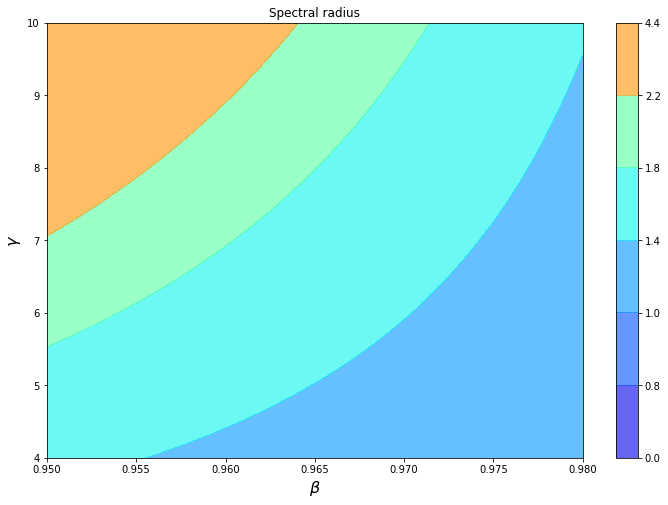

In [167]:
m = 20 # grid size
x_vals = np.linspace(0.95, 0.98, m) # beta
y_vals = np.linspace(4, 10, m)  # gamma

R = np.empty((m, m))

for i, beta in enumerate(x_vals):
    for j, gamma in enumerate(y_vals):
    #mc = qe.rouwenhorst(n, b, sigma, a)
        R[i, j] = ez_operator_spec_rad(beta, gamma, rho, mc)

fig, ax = plt.subplots(figsize=(12, 8))

lvs = [0.0, 0.8, 1.0, 1.4, 1.8, 2.2, 4.4]
cls = [cm.jet(i) for i in np.linspace(0.4, 1, len(lvs))]

cs1 = ax.contourf(x_vals, 
            y_vals, 
            R.T,
            levels=lvs,
            cmap=cm.jet,
            alpha=0.6)

ctr1 = ax.contour(x_vals, y_vals, R.T, levels=[1.0], linewidths=2)
plt.clabel(ctr1, inline=1, fontsize=13)
plt.colorbar(cs1, ax=ax)

ax.set_title(r'Spectral radius'.format(rho))
ax.set_xlabel(r'$\beta$', fontsize=16)
ax.set_ylabel(r'$\gamma$', fontsize=16)

plt.show()

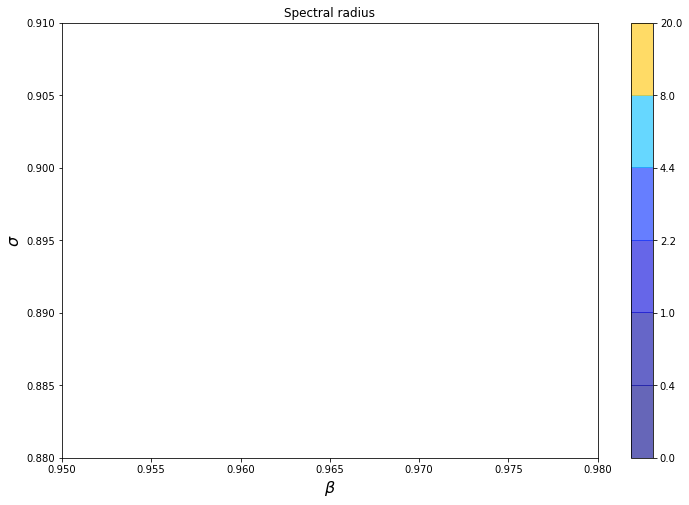

In [168]:
m = 20 # grid size
x_vals = np.linspace(0.95, 0.98, m) # beta
y_vals = np.linspace(0.88, 0.91, m)  # sigma

R = np.empty((m, m))

for i, beta in enumerate(x_vals):
    for j, sigma in enumerate(y_vals):
        mc = qe.rouwenhorst(n, b, sigma, a)
        R[i, j] = ez_operator_spec_rad(beta, gamma, rho, mc)

fig, ax = plt.subplots(figsize=(12, 8))

lvs = [0.0, 0.4, 1.0, 2.2, 4.4, 8, 20]
cls = [cm.jet(i) for i in np.linspace(0.4, 1, len(lvs))]

cs1 = ax.contourf(x_vals, 
            y_vals, 
            R.T,
            levels=lvs,
            cmap=cm.jet,
            alpha=0.6)

ctr1 = ax.contour(x_vals, y_vals, R.T, levels=[1.0], linewidths=2)
plt.clabel(ctr1, inline=1, fontsize=13)
plt.colorbar(cs1, ax=ax)

ax.set_title(r'Spectral radius'.format(rho))
ax.set_xlabel(r'$\beta$', fontsize=16)
ax.set_ylabel(r'$\sigma$', fontsize=16)

plt.show()

### Code below is for testing Rouwenhorst, probably redundant

Let's do some tests to make sure the Markov chain is relatively well behaved.  The mean and variance of the stationary distribution should be close to $b/(1 - a)$ and $\sigma^2 / (1 - a^2)$ respectively

In [68]:
b / (1 - a), sigma**2 / (1 - a**2)

(10.000000000000002, 0.052631578947368446)

In [69]:
psi = mc.stationary_distributions

In [70]:
psi = psi.flatten()

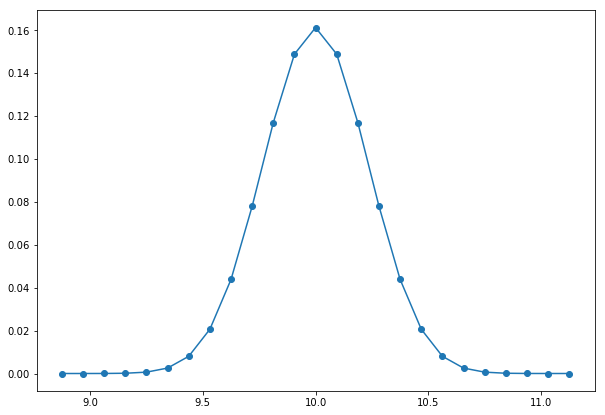

In [71]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.get_xaxis().get_major_formatter().set_useOffset(False)

ax.plot(mc.state_values, psi, 'o-')
plt.show()

In [72]:
s = mc.state_values
mu = np.sum(s * psi)
mu

10.000000000000002

In [73]:
v = np.sum((s - mu)**2 * psi)
v

0.052631578947368481

In [74]:
mc.state_values

array([  8.87609703,   8.96975561,   9.06341419,   9.15707277,
         9.25073135,   9.34438993,   9.43804851,   9.53170709,
         9.62536568,   9.71902426,   9.81268284,   9.90634142,
        10.        ,  10.09365858,  10.18731716,  10.28097574,
        10.37463432,  10.46829291,  10.56195149,  10.65561007,
        10.74926865,  10.84292723,  10.93658581,  11.03024439,  11.12390297])